In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df = pd.read_csv('Absenteeism_at_work.csv')
print('DataFrame Shape ::', df.shape)
df

DataFrame Shape :: (740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

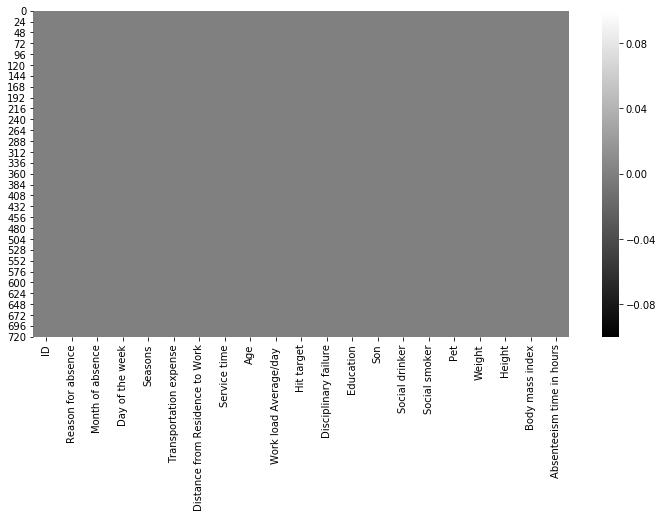

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='gray')

In [6]:
df.loc[:,'Age':].describe()

,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Observations:
    1. ID starts from 1 to 36 and is not unique for each row.
    2. Reason for absence must be converted to categorical values.
    3. It is not possible to have 0 in Month of absence and must start from January to December.
    4. Day of the week will be converted to categorical data from Monday to Friday.
    5. Seasons will also be converted to categorical data.
    6. Majority is high-school
    7. Son is # of children.
    8. The data has more drinkers and less smokers.

In [7]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum())
        print(df[i].describe(), '\n')
    else:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum(), '\n')
        print(df[i].unique())

####### ID #######
>> Number of Unique Values :: 36
>> Number for Null Values :: 0
count    740.000000
mean      18.017568
std       11.021247
min        1.000000
25%        9.000000
50%       18.000000
75%       28.000000
max       36.000000
Name: ID, dtype: float64 

####### Reason for absence #######
>> Number of Unique Values :: 28
>> Number for Null Values :: 0
count    740.000000
mean      19.216216
std        8.433406
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64 

####### Month of absence #######
>> Number of Unique Values :: 13
>> Number for Null Values :: 0 

[ 7  8  9 10 11 12  1  2  3  4  5  6  0]
####### Day of the week #######
>> Number of Unique Values :: 5
>> Number for Null Values :: 0 

[3 4 5 6 2]
####### Seasons #######
>> Number of Unique Values :: 4
>> Number for Null Values :: 0 

[1 4 2 3]
####### Transportation expense #######
>> Number of Unique Values :: 24
>> Numbe

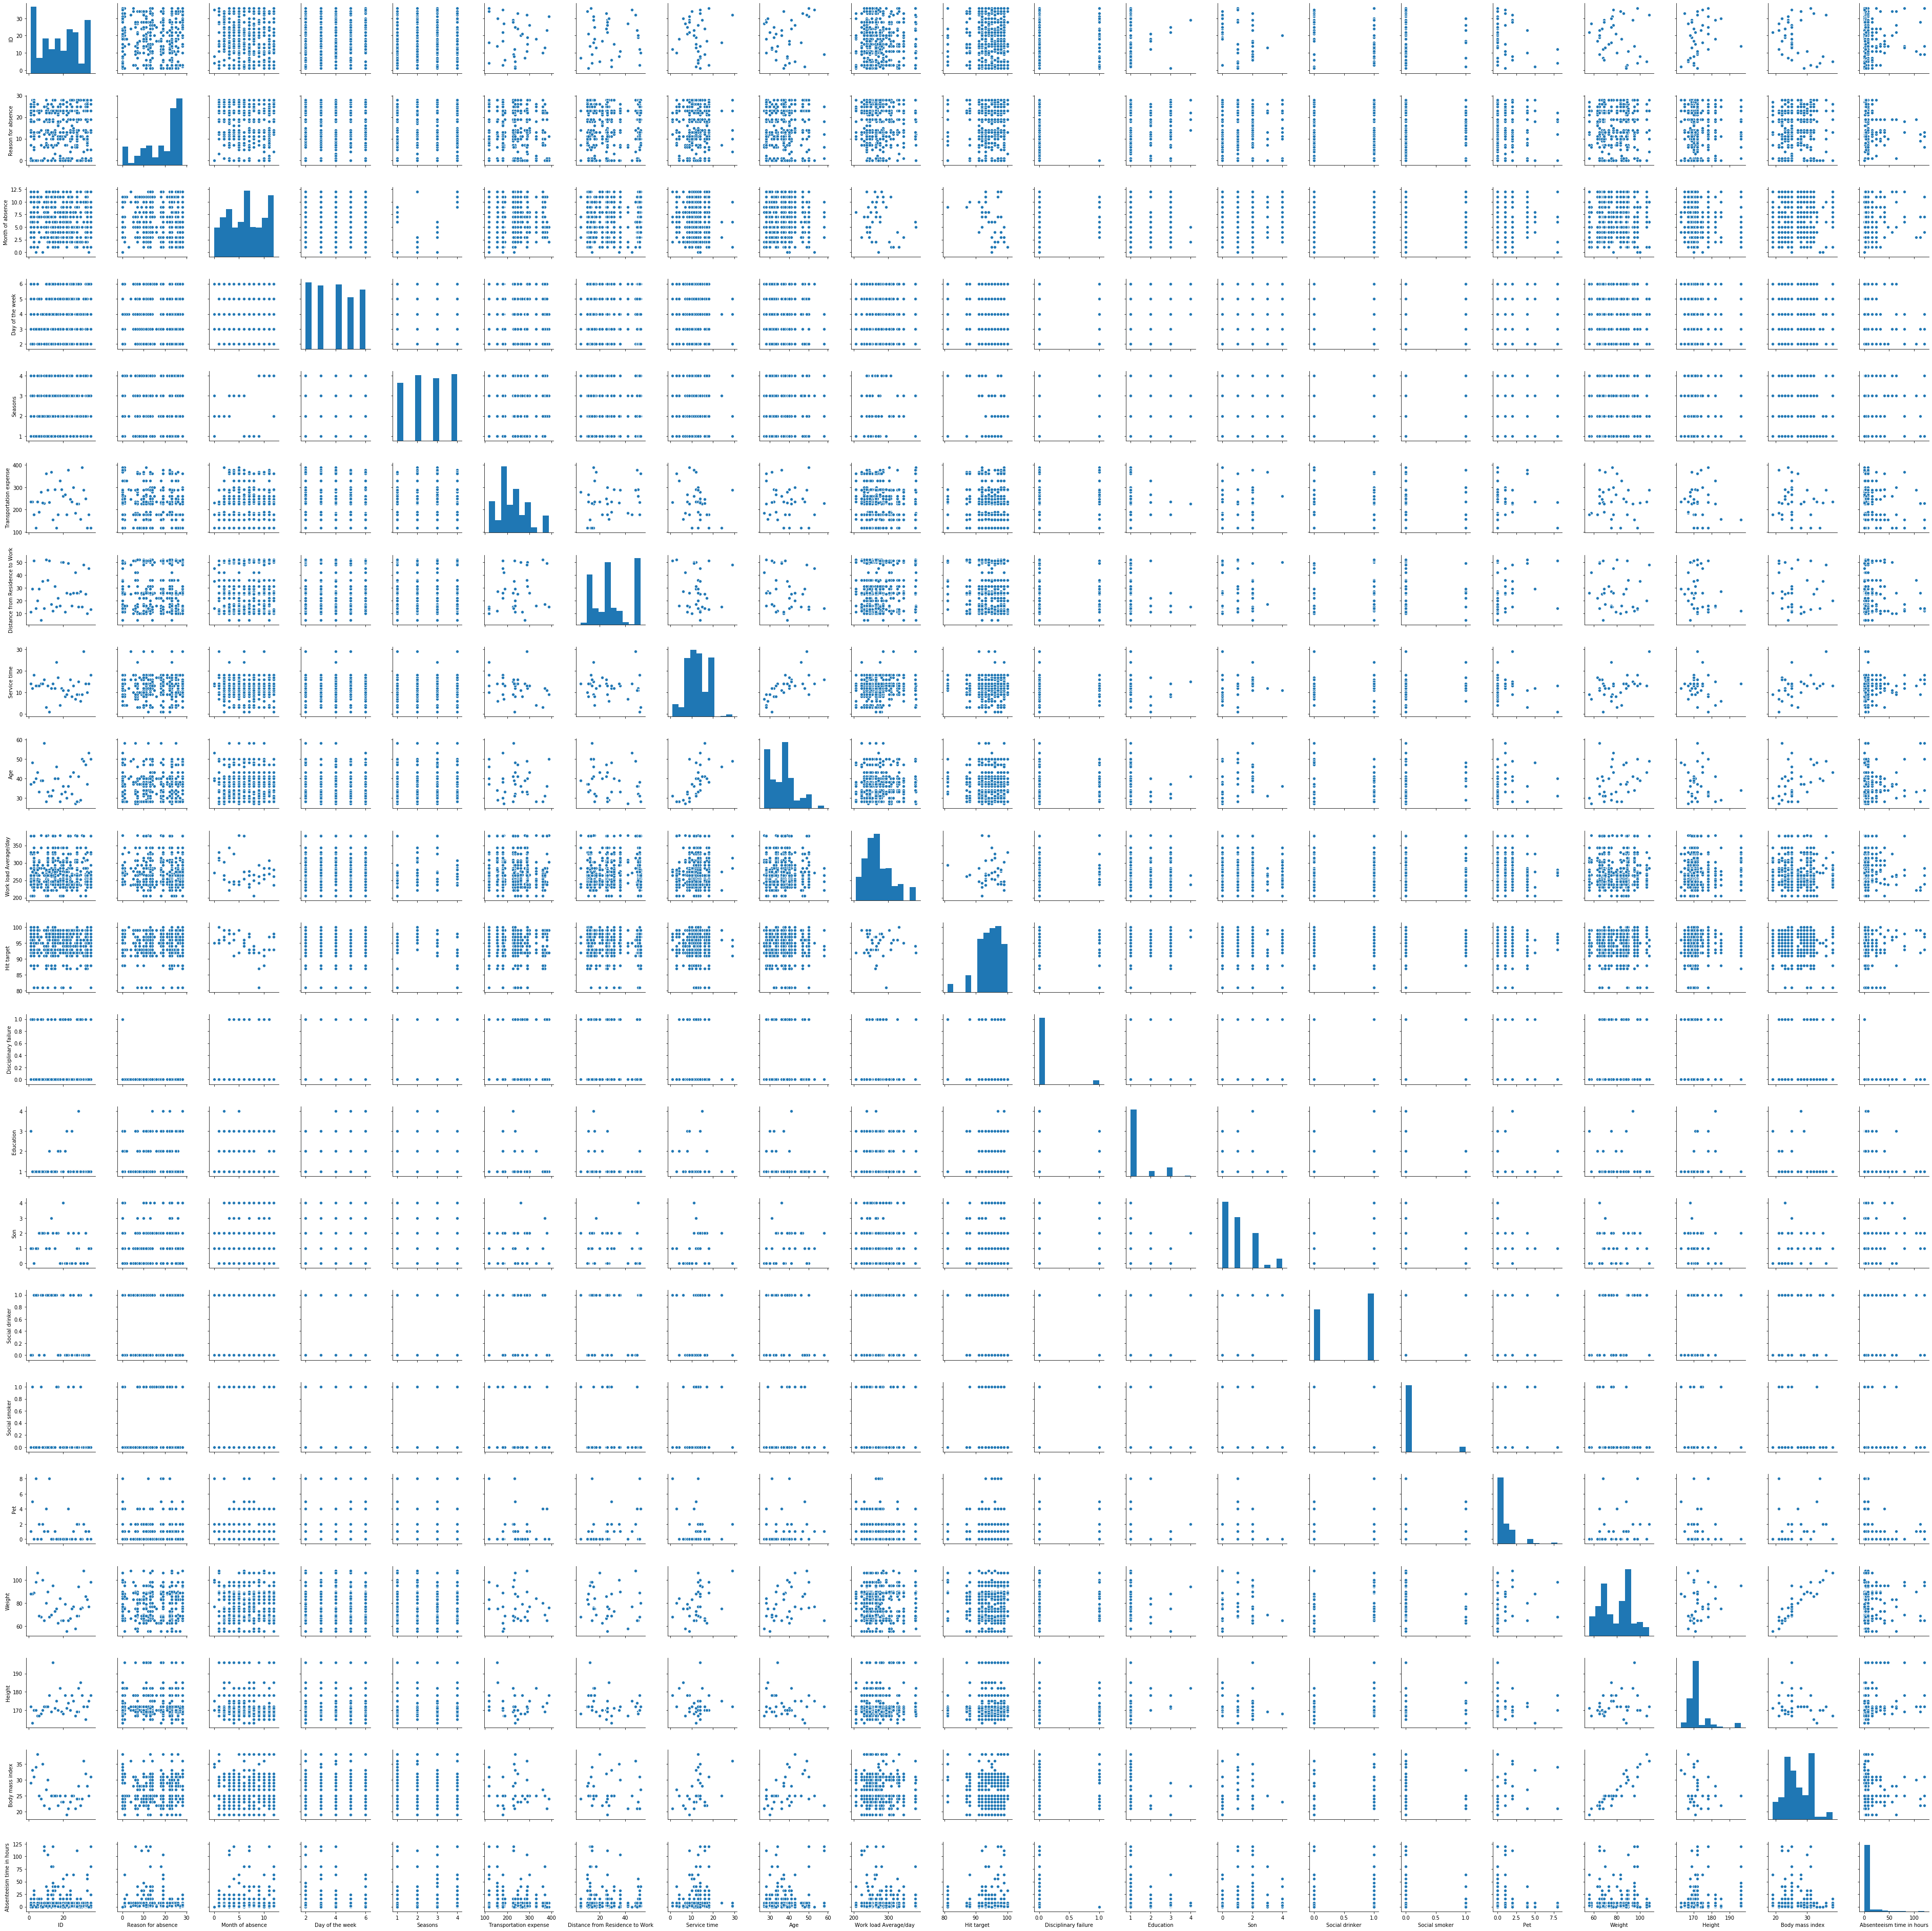

In [8]:
sns.pairplot(df)

In [9]:
df['ID'].duplicated().sum()

704

In [10]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 21
>>> Number of Categorical Features :: 0
>>> Number of Numerical Features :: 21


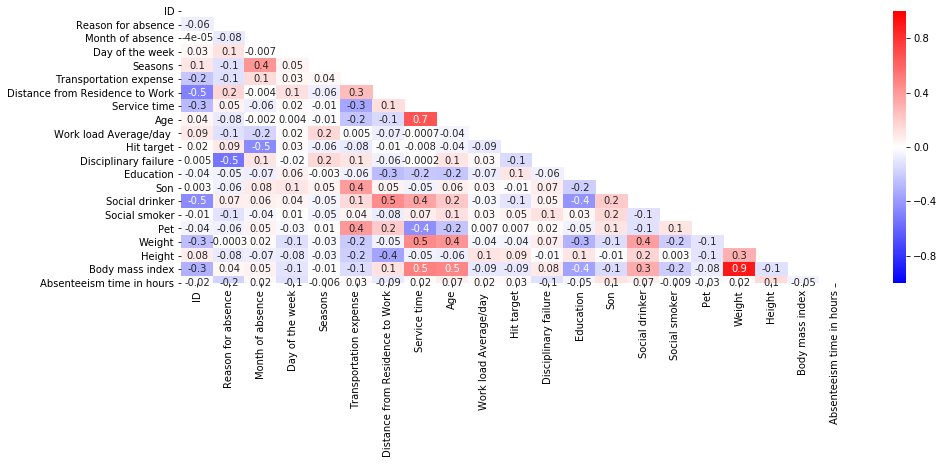

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot= True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

Observations:
    1. High positive correlation Weight & Body mass index, Service time & age.
    2. High negative correlation ID and other columns.

Skewness of ID = 0.02
Skewness of Reason for absence = -0.92
Skewness of Month of absence = 0.07
Skewness of Day of the week = 0.10
Skewness of Seasons = -0.04
Skewness of Transportation expense = 0.40
Skewness of Distance from Residence to Work = 0.31
Skewness of Service time = -0.00
Skewness of Age = 0.70
Skewness of Work load Average/day  = 0.96
Skewness of Hit target = -1.26
Skewness of Disciplinary failure = 3.95
Skewness of Education = 2.11
Skewness of Son = 1.09
Skewness of Social drinker = -0.27
Skewness of Social smoker = 3.29
Skewness of Pet = 2.74
Skewness of Weight = 0.02
Skewness of Height = 2.57
Skewness of Body mass index = 0.31
Skewness of Absenteeism time in hours = 5.72


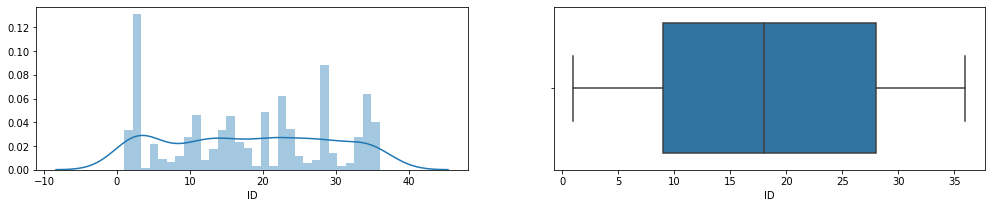

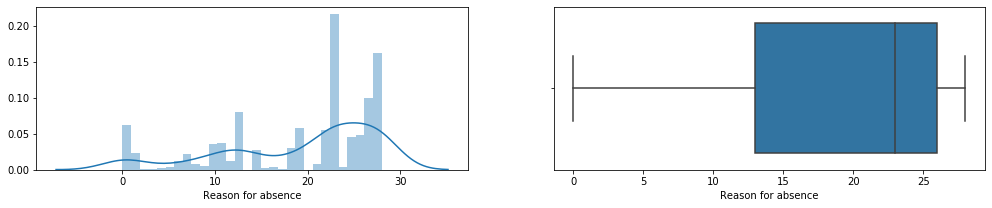

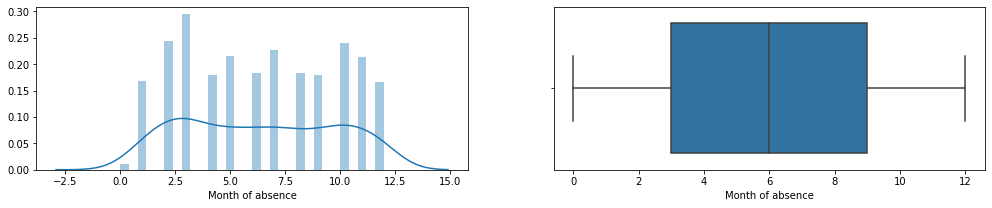

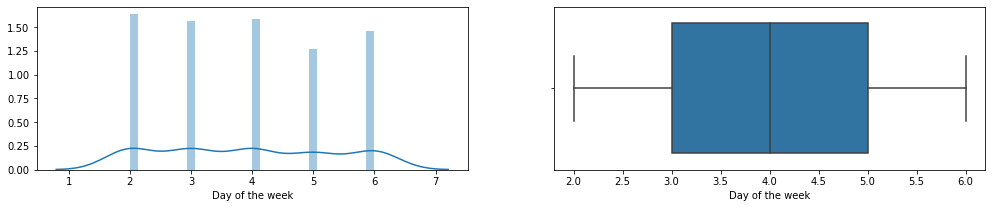

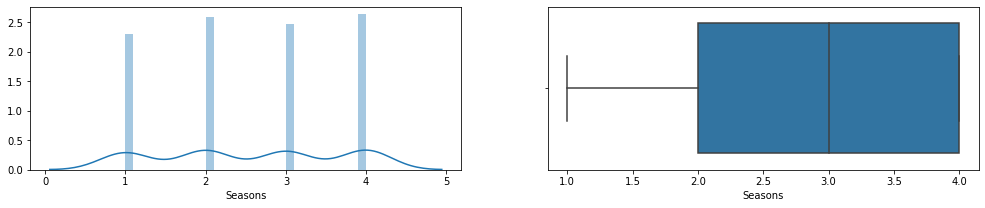

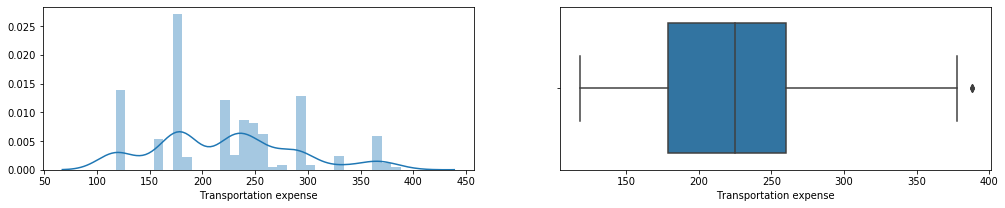

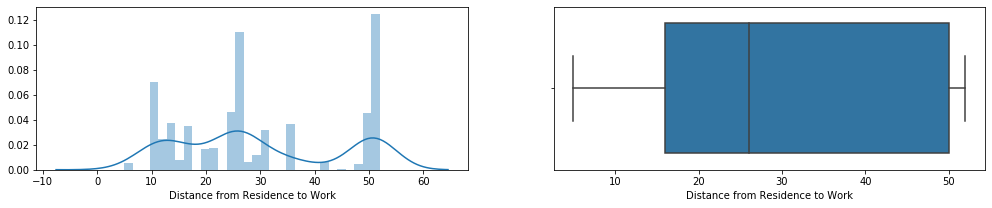

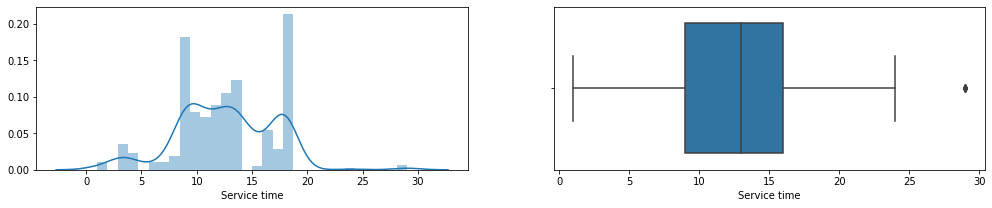

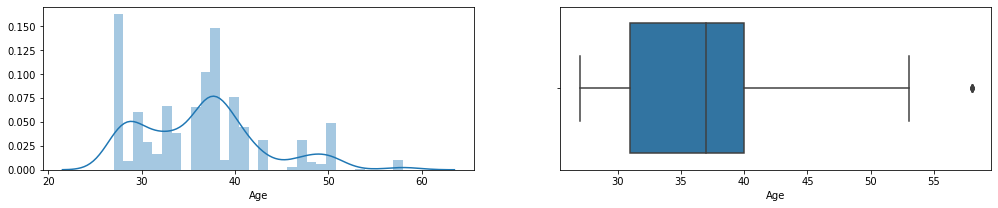

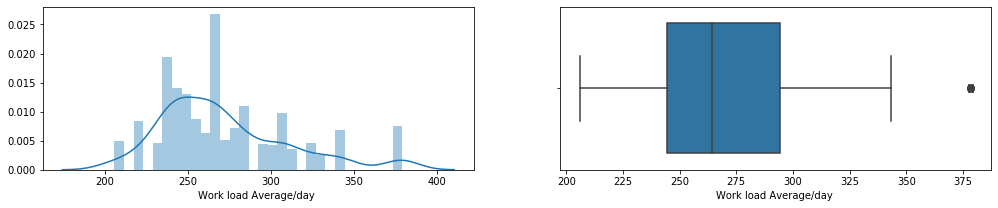

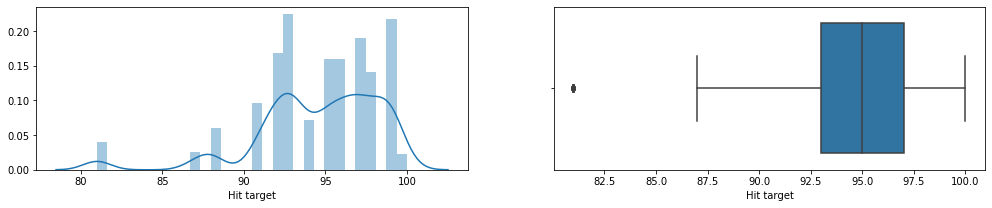

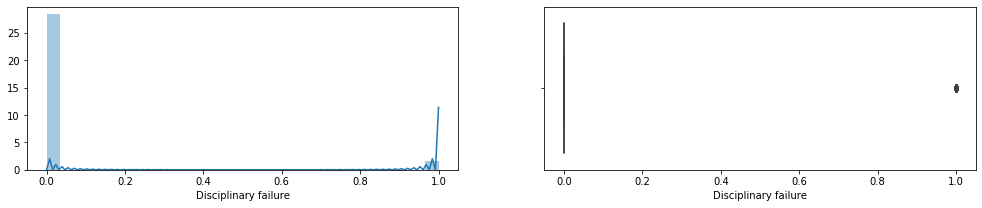

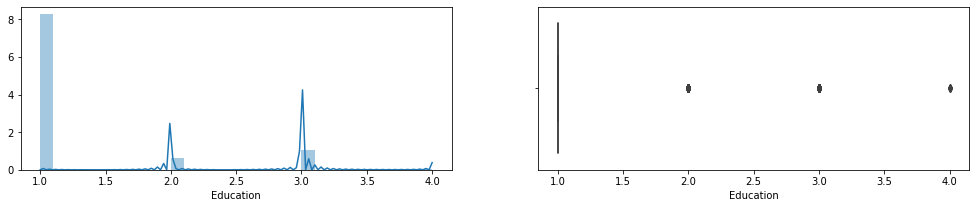

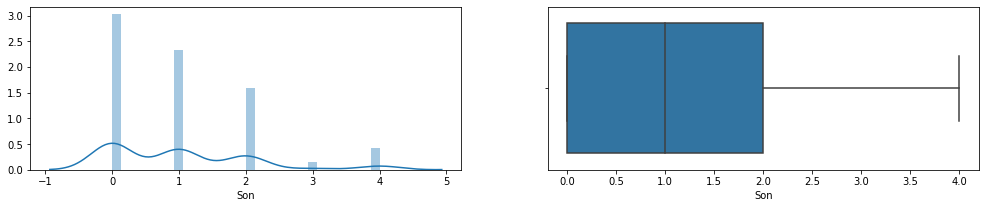

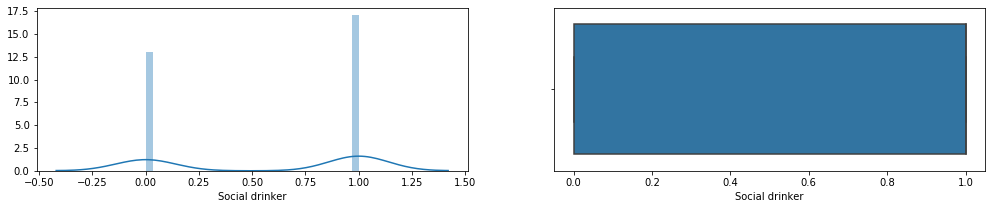

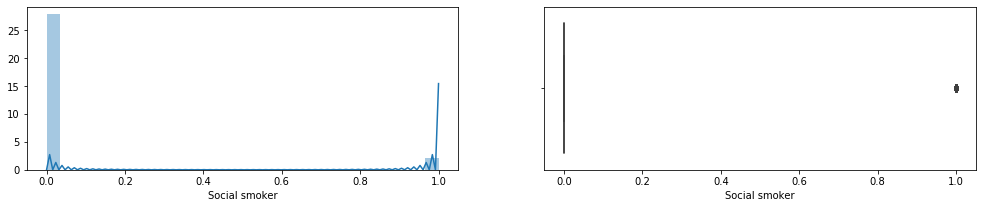

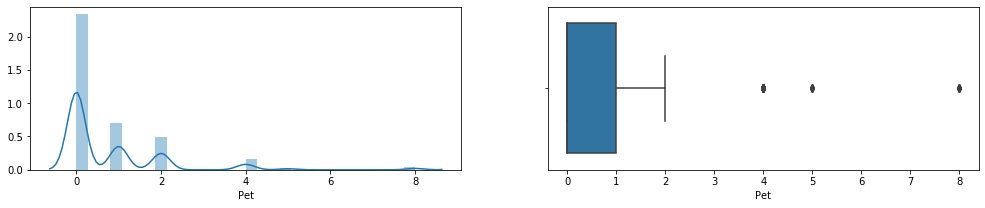

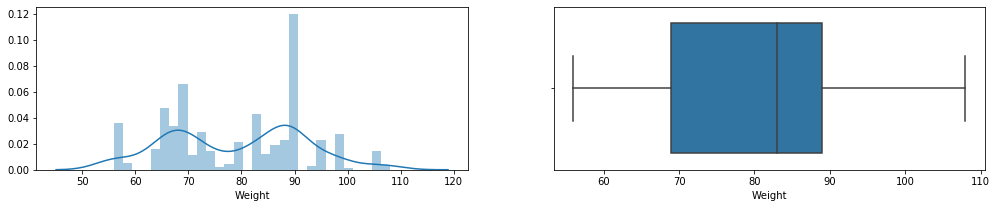

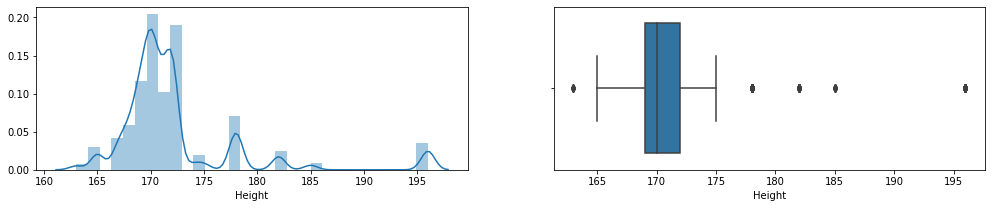

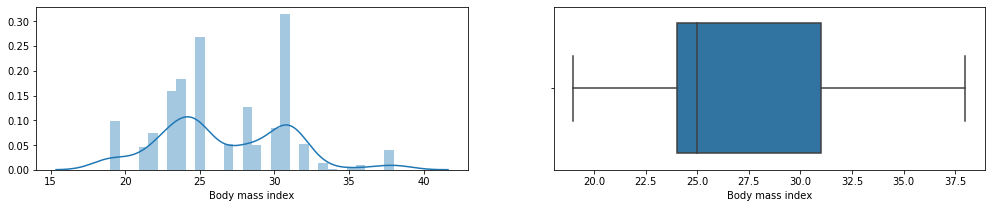

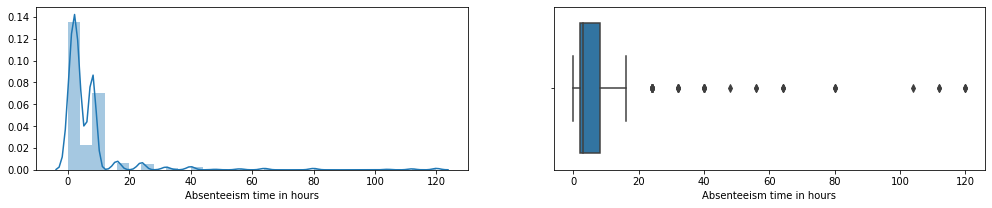

In [12]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

In [13]:
# df['Reason for absence'].unique()
absence_lst = {0:'Unknown', 1:'Parasitic', 2:'Neoplasms', 3:'immunity_related', 4:'metabolic', 5:'Mental', 6:'nervous_related',
               7:'eye', 8:'ear', 9:'circulatory', 10:'respiratory', 11:'digestive', 12:'skin', 13:'connective_tissue',
               14:'genitourinary', 15:'Pregnancy', 16:'perinatal', 17:'malformations_deformations_abnormalities',
               18:'clinical_laboratory', 19:'Injury_poisoning', 20:'morbidity_mortality', 21:'health_status',
               22:'patient_follow_up', 23:'medical_consultation', 24:'blood_donation', 25:'laboratory_examination',
               26:'unjustified_absence', 27:'physiotherapy', 28:'dental_consultation'}

In [14]:
# df['Day of the week'].unique()
week_lst = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'}

In [15]:
# df['Seasons'].unique()
seasons_lst = {1:'summer', 2:'autumn', 3:'winter', 4:'spring'}

In [16]:
# df['Education'].unique()
education_lst = {1:'high_school', 2:'graduate', 3:'post_graduate', 4:'master_doctor'}

In [17]:
df['Reason for absence'].replace(absence_lst, inplace=True)
df['Day of the week'].replace(week_lst, inplace=True)
df['Seasons'].replace(seasons_lst, inplace=True)
df['Education'].replace(education_lst, inplace=True)

In [18]:
df.columns = ['ID', 'absence_reason', 'absence_months', 'weekday', 'Seasons', 'Travel_expense',
              'Residence_to_Work', 'Service_time', 'Age', 'Workload_average_day', 'Hit_target',
              'Disciplinary_failure', 'Education', 'Children', 'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Height',
              'Body_mass_index','Absenteeism_time_hrs']

In [19]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 21
>>> Number of Categorical Features :: 4
>>> Number of Numerical Features :: 17


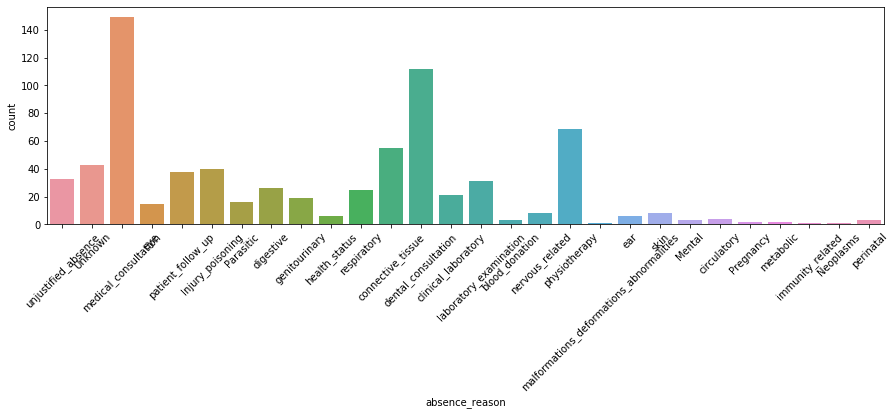

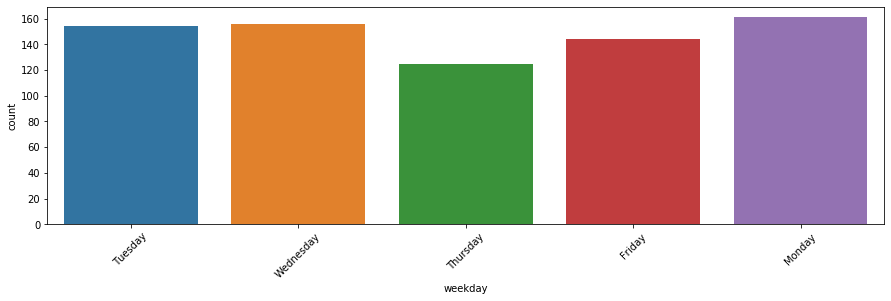

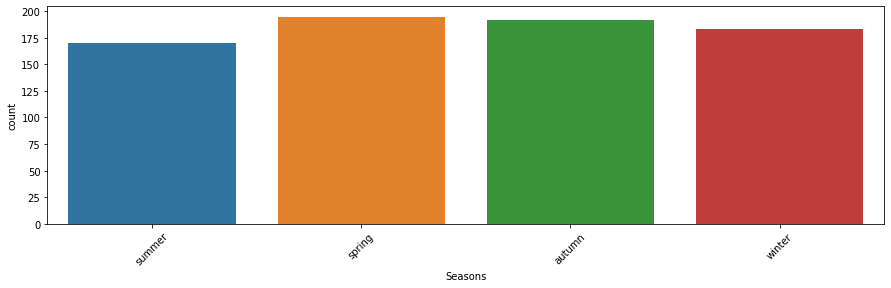

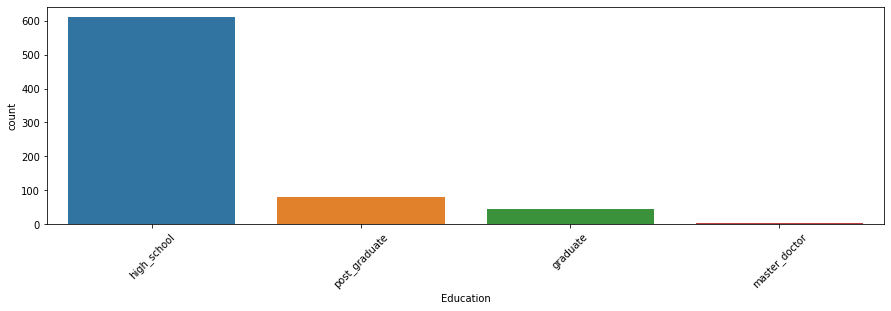

In [20]:
for i in [x for x in df.columns if x not in num_df] :
    plt.figure(figsize=(15,4))
    plt.xticks(rotation=45)
    sns.countplot(x=i, data=df,)

In [21]:
df['Absenteeism_time_hrs'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism_time_hrs, dtype: float64

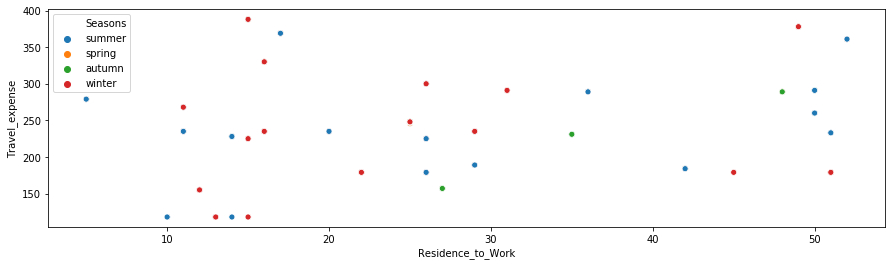

In [22]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Residence_to_Work', y='Travel_expense', hue='Seasons', data=df)

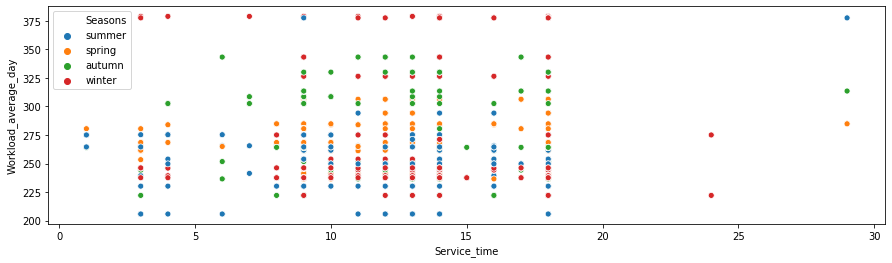

In [23]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Service_time', y='Workload_average_day', hue='Seasons', data=df)

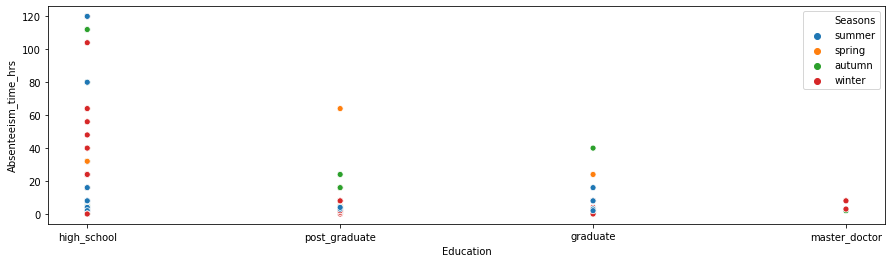

In [24]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Education', y='Absenteeism_time_hrs', hue='Seasons', data=df)

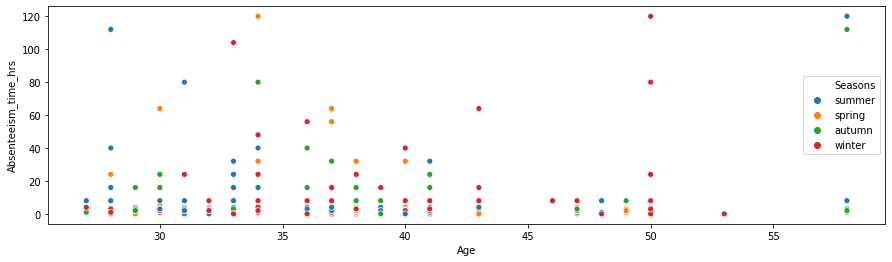

In [25]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Age', y='Absenteeism_time_hrs', hue='Seasons', data=df)

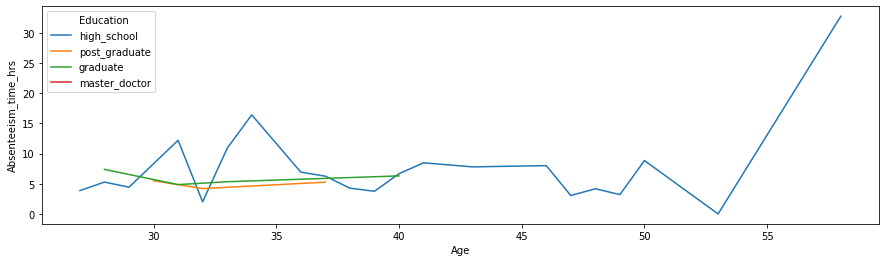

In [26]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Age',y='Absenteeism_time_hrs',hue='Education',data=df, ci=None)

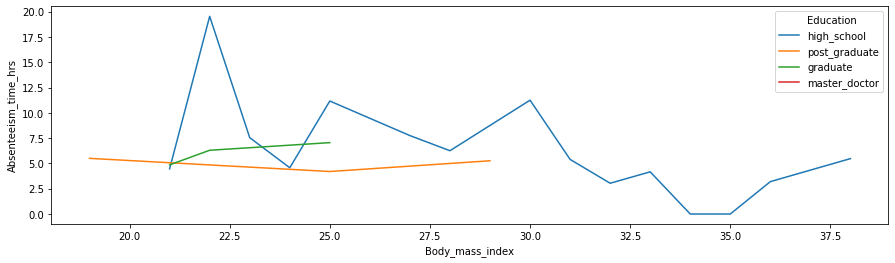

In [27]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Body_mass_index',y='Absenteeism_time_hrs',hue='Education',data=df, ci=None)

## Removing Outliers using ZScore

In [28]:
z = np.abs(zscore(df[num_df]))

In [29]:
#consider threshold = 3
np.where(z>3)

(array([  1,   3,   8,  27,  31,  31,  33,  33,  38,  38,  44,  50,  51,
         54,  55,  58,  64,  83,  85,  89,  91,  99, 104, 116, 140, 157,
        158, 164, 165, 167, 169, 172, 180, 186, 188, 197, 199, 200, 203,
        203, 203, 205, 206, 210, 213, 213, 214, 215, 215, 216, 226, 231,
        232, 234, 236, 242, 245, 251, 253, 255, 256, 257, 270, 271, 272,
        273, 273, 274, 275, 276, 276, 277, 277, 278, 279, 280, 281, 282,
        283, 284, 285, 285, 286, 287, 288, 293, 294, 299, 300, 303, 311,
        312, 313, 313, 322, 323, 323, 325, 336, 336, 337, 337, 355, 360,
        362, 384, 396, 397, 400, 405, 406, 407, 420, 421, 432, 433, 434,
        446, 468, 469, 469, 471, 479, 481, 488, 498, 507, 510, 513, 521,
        530, 548, 549, 551, 562, 564, 569, 569, 572, 573, 575, 576, 577,
        579, 594, 601, 603, 608, 620, 622, 622, 640, 647, 648, 652, 661,
        670, 682, 682, 688, 690, 690, 691, 692, 692, 695, 702, 703, 704,
        706, 710, 712, 714, 714, 714, 715, 721, 724

In [30]:
df=df[(z<3).all(axis=1)]
df

,ID,absence_reason,absence_months,weekday,Seasons,Travel_expense,Residence_to_Work,Service_time,Age,Workload_average_day,...,Disciplinary_failure,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_hrs
0,11,unjustified_absence,7,Tuesday,summer,289,36,13,33,239.554,...,0,high_school,2,1,0,1,90,172,30,4
2,3,medical_consultation,7,Wednesday,summer,179,51,18,38,239.554,...,0,high_school,0,1,0,0,89,170,31,2
4,11,medical_consultation,7,Thursday,summer,289,36,13,33,239.554,...,0,high_school,2,1,0,1,90,172,30,2
5,3,medical_consultation,7,Friday,summer,179,51,18,38,239.554,...,0,high_school,0,1,0,0,89,170,31,2
6,10,patient_follow_up,7,Friday,summer,361,52,3,28,239.554,...,0,high_school,1,1,0,4,80,172,27,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,28,patient_follow_up,7,Wednesday,summer,225,26,9,28,264.604,...,0,high_school,1,0,0,2,69,169,24,8
735,11,genitourinary,7,Tuesday,summer,289,36,13,33,264.604,...,0,high_school,2,1,0,1,90,172,30,8
736,1,digestive,7,Tuesday,summer,235,11,14,37,264.604,...,0,post_graduate,1,0,0,1,88,172,29,4
738,8,Unknown,0,Wednesday,autumn,231,35,14,39,271.219,...,0,high_school,2,1,0,2,100,170,35,0


In [31]:
df = pd.get_dummies(df)
df.head(5)

,ID,absence_months,Travel_expense,Residence_to_Work,Service_time,Age,Workload_average_day,Hit_target,Disciplinary_failure,Children,...,weekday_Tuesday,weekday_Wednesday,Seasons_autumn,Seasons_spring,Seasons_summer,Seasons_winter,Education_graduate,Education_high_school,Education_master_doctor,Education_post_graduate
0,11,7,289,36,13,33,239.554,97,0,2,...,1,0,0,0,1,0,0,1,0,0
2,3,7,179,51,18,38,239.554,97,0,0,...,0,1,0,0,1,0,0,1,0,0
4,11,7,289,36,13,33,239.554,97,0,2,...,0,0,0,0,1,0,0,1,0,0
5,3,7,179,51,18,38,239.554,97,0,0,...,0,0,0,0,1,0,0,1,0,0
6,10,7,361,52,3,28,239.554,97,0,1,...,0,0,0,0,1,0,0,1,0,0


In [32]:
# Splitting x and y from data
x = df.drop(columns=['Absenteeism_time_hrs'], axis=1)
y = df['Absenteeism_time_hrs']
print('Shape of x :: %s\nShape of y :: %s' %(x.shape, y.shape))

Shape of x :: (580, 56)
Shape of y :: (580,)


In [33]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [34]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(580, 10)

### Machine Learning Algorithms

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (464, 10) | x_test.shape --> (116, 10) 
y_train.shape --> (464,) | y_test.shape --> (116,)


In [36]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [37]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [38]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [39]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------------- Linear Regression -------------------
Accuracy Score :: 16.75
R2 Score: 0.13458415736540996
>>> Error >>>
Mean Absolute Error: 3.200263613634676
Mean Squared Error: 28.13116004521178
Root Mean Squared Error: 5.30388160173394
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 36.60
R2 Score: -0.08216808413351617
>>> Error >>>
Mean Absolute Error: 3.374137931034483
Mean Squared Error: 35.176896551724134
Root Mean Squared Error: 5.93101142738101
------------------- Ridge Regression -------------------
Accuracy Score :: 16.75
R2 Score: 0.13457112980489705
>>> Error >>>
Mean Absolute Error: 3.200060862608464
Mean Squared Error: 28.131583518381248
Root Mean Squared Error: 5.303921522645414
------------------- Lasso Regression -------------------
Accuracy Score :: 8.49
R2 Score: 0.04360475054947821
>>> Error >>>
Mean Absolute Error: 3.564807937514768
Mean Squared Error: 31.08853166688899
Root Mean Squared Error: 5.5757090730138525
-------------

In [40]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,RMSE
6,Decision Tree Regression,94.8491,7.48706
7,Random Forest Regressor,81.9341,5.47482
1,K-Neighbors Regressor,36.6037,5.93101
5,Support Vector Regression,17.1512,5.41826
0,Linear Regression,16.7516,5.30388
2,Ridge Regression,16.7516,5.30392
4,Elastic Net,11.9671,5.5251
3,Lasso Regression,8.49428,5.57571


In [41]:
cv_scores = cross_val_score(dct, x_train, y_train, cv=10)
cv_scores.mean()*100

-119.68796940985126

### Hyperparameter Tuning using GridSearchCV

In [42]:
# Instantiate with default values
dct = DecisionTreeRegressor(random_state=42)

In [43]:
dct_param = {"criterion": ["mse", "mae"],
             "min_samples_split": [10, 20, 40],
             "max_depth": [2, 6, 8],
             "min_samples_leaf": [20, 40, 100],
             "max_leaf_nodes": [5, 20, 100],
            }

In [44]:
b_dct=GridSearchCV(dct, dct_param, scoring='neg_mean_absolute_error')
b_dct.fit(x_train,y_train)
print('Decision Tree Regressor >>>', b_dct.best_params_)

Decision Tree Regressor >>> {'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [45]:
# Instantiate with new parameters
dct = DecisionTreeRegressor(random_state=42, criterion='mae', max_depth=2, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10)
dct.fit(x_train, y_train)
print(dct.score(x_train, y_train)*100)

0.13644272099809784


Conclusion:
    1. Lasso regression is the worst model with 8.82% accuracy.
    2. We could not acheive a good score through cross validation.
    3. Hyperparameter tuning did not give a good score.
    4. Ridge Regression and Lasso Regression did not improve the score from Linear Regression.
    5. As we can see, Decision Tree Regression gained 94.84% accuracy and is the best model for this dataset.

In [46]:
dct = DecisionTreeRegressor()

In [47]:
#Exporting model as pkl file
joblib.dump(dct,'dct_Absenteeism_at_work.pkl')

['dct_Absenteeism_at_work.pkl']

In [48]:
# predict the value
dct.fit(x_train, y_train)
pred=dct.predict(x_test)
print("Predicted Result Price:",pred)

Predicted Result Price: [ 1.   3.   2.  13.5  2.   8.   2.   8.   8.   1.   2.   1.   5.   8.
  8.   2.   1.   3.   3.   3.   2.   1.   1.  16.   1.   2.   3.   8.
  1.   8.   1.   4.   4.   2.   3.   2.   4.   3.   1.   8.   8.  13.5
  8.   6.   2.   3.   8.   2.   1.  16.   1.   2.   1.   8.   4.   4.5
  8.   8.   3.   3.   2.   3.5 16.   1.   8.   2.   3.   1.   2.   2.
  3.  16.   2.   8.   8.   4.   2.   8.   4.   2.5  2.   2.   8.   8.
  5.   1.   3.   2.   2.   2.   3.   8.   1.   2.   3.   3.   8.   8.
  8.   1.  13.5  2.   8.   3.   2.   3.   2.   3.   8.   8.   8.   4.
  2.   8.   8.   1. ]


In [49]:
df_pred=pd.DataFrame(pred)
df_pred.to_csv('Absenteeism_at_work_prediction.csv')